In [1]:
#####################################################################################################
#####################################################################################################
# Sentiment analysis with NLTK method
#####################################################################################################
#####################################################################################################

In [2]:
# Launched the programm 
%run "C:\\Users\\....\\Program\\2_Import and cleaning abstracts.ipynb"


In [3]:
# Change column names
articles_vf.columns = ['Identifier','Abstract','Selection']

# Keep only abstract selected manually
articles_vf=articles_vf[articles_vf.Selection != 0]
del articles_vf['Selection']

# Keep and save identifier for a next use
Identifier_list=list(articles_vf['Identifier'])

# Formating data for analysis sentiment with NLTK
articles_vf['ID_abstract'] = articles_vf['Identifier'] + " " + articles_vf['Abstract']
del articles_vf['Identifier']
del articles_vf['Abstract']

Abstract_list=list(articles_vf.values.flatten())


In [4]:
# Import packages for graphics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [5]:
# Function for sentiment analysis with NLTK
def nltk_sentiment(text):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(text)
    return score

nltk_results = [nltk_sentiment(row) for row in Abstract_list]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(Abstract_list, columns = ['Abstract'])
nltk_df = text_df.join(results_df)

# Export the NLTK result (Identifier, Abstract and NLTK indicators)
nltk_df.to_excel (r'C:\\Users\\....\\Result\\nltk_result.xlsx', index = False, header=True)

# Data formating for graphics
value_list = []

for val in nltk_results:
    list_values = [v for v in val.values()]
    value_list.append(list_values)
    

In [6]:
# Transform the dataframe
NLTK_base=pd.DataFrame(value_list)

# Change column names
NLTK_base.columns  = ['Negative', 'Neutral','Positive','Compound']

# Add the identifier column previously isolated
NLTK_base["ID_Abstract"] = Identifier_list


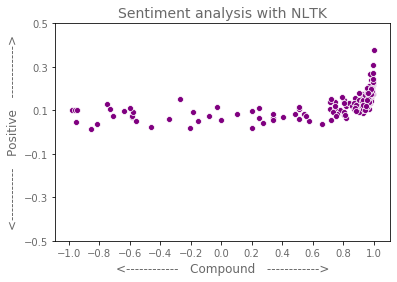

In [7]:
# First Graphic

G1_NLTK=sns.scatterplot(x="Compound", y="Positive", data=NLTK_base, color=['purple'])

plt.xticks(np.arange(-1, 1.1, 0.2))   
plt.yticks(np.arange(-0.5, 0.6, 0.2)) 
 
plt.tick_params(labelcolor='dimgrey', labelsize='medium') 
    
plt.title('Sentiment analysis with NLTK', color='dimgrey',fontsize=14)
plt.xlabel('<------------   Compound   ------------>', color='dimgrey', fontsize=12)
plt.ylabel('<------------   Positive   ------------>', color='dimgrey',fontsize=12)

plt.rcParams['figure.figsize'] = [12,10]

# Print the plot
plt.show() 

# Save the plot
fig = G1_NLTK.get_figure()
fig.savefig("C:\\Users\\....\\Result\\Graph_NLTK_1.png")


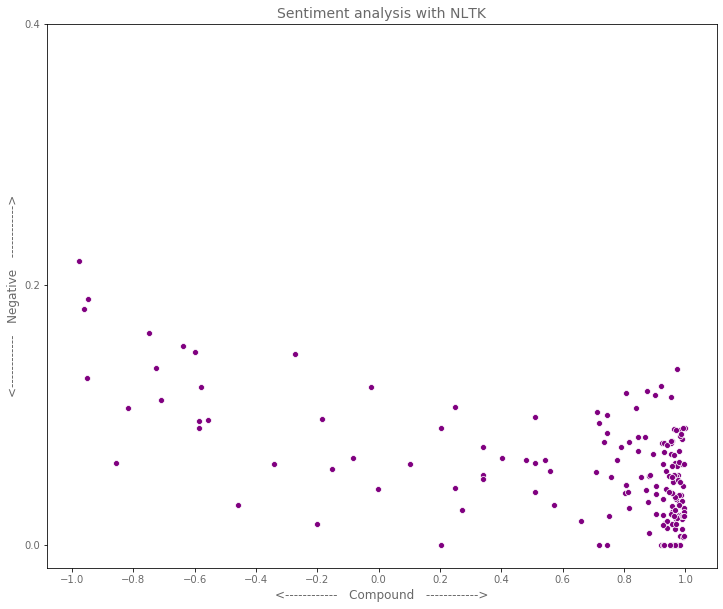

In [8]:
# Second Graphic

G2_NLTK=sns.scatterplot(x="Compound", y="Negative", data=NLTK_base, color=['purple'])

plt.xticks(np.arange(-1,1.1, 0.2)) 
plt.yticks(np.arange(0,0.6, 0.2))  
 
plt.tick_params(labelcolor='dimgrey', labelsize='medium')
    
plt.title('Sentiment analysis with NLTK', color='dimgrey',fontsize=14)
plt.xlabel('<------------   Compound   ------------>', color='dimgrey', fontsize=12)
plt.ylabel('<------------   Negative   ------------>', color='dimgrey',fontsize=12)

plt.rcParams['figure.figsize'] = [12,10]

# Print the plot
plt.show() 

# Save the plot  
fig = G2_NLTK.get_figure()
fig.savefig("C:\\Users\\....\\Result\\Graph_NLTK_2.png")


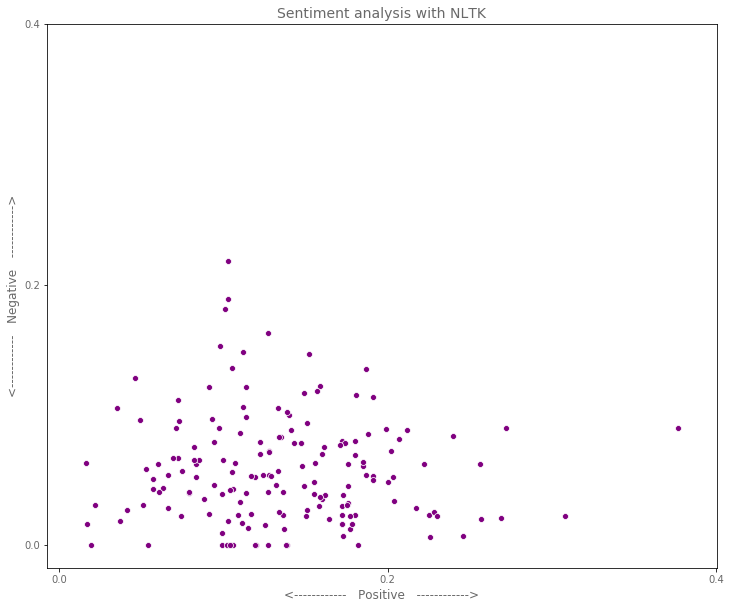

In [9]:
# Third Graphic

G3_NLTK=sns.scatterplot(x="Positive", y="Negative", data=NLTK_base, color=['purple'])

plt.xticks(np.arange(0,0.6, 0.2))  
plt.yticks(np.arange(0,0.6, 0.2))  
 
plt.tick_params(labelcolor='dimgrey', labelsize='medium') 
    
plt.title('Sentiment analysis with NLTK', color='dimgrey',fontsize=14)
plt.xlabel('<------------   Positive   ------------>', color='dimgrey', fontsize=12)
plt.ylabel('<------------   Negative   ------------>', color='dimgrey',fontsize=12)

plt.rcParams['figure.figsize'] = [12,10]

# Print the plot
plt.show() 

# Save the plot
fig = G3_NLTK.get_figure()
fig.savefig("C:\\Users\\....\\Result\\Graph_NLTK_3.png")
